<a href="https://colab.research.google.com/github/rakeshkumaryadav63/Rakesh/blob/main/chapter_multilinear_regression/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
 import numpy as numpy
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LinearRegression
 from sklearn.metrics import r2_score

In [7]:
data= pd.read_csv('/content/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
data=pd.get_dummies(data, columns=['State'],dtype=int)
data

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [12]:
X=data.drop('Profit',axis=1)
y=data['Profit']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_test,y_train,y_test

(    R&D Spend  Administration  Marketing Spend  State_California  \
 12   93863.75       127320.38        249839.44                 0   
 4   142107.34        91391.77        366168.42                 0   
 37   44069.95        51283.14        197029.42                 1   
 8   120542.52       148718.95        311613.29                 0   
 3   144372.41       118671.85        383199.62                 0   
 6   134615.46       147198.87        127716.82                 1   
 41   27892.92        84710.77        164470.71                 0   
 46    1315.46       115816.21        297114.46                 0   
 47       0.00       135426.92             0.00                 1   
 15  114523.61       122616.84        261776.23                 0   
 9   123334.88       108679.17        304981.62                 1   
 16   78013.11       121597.55        264346.06                 1   
 24   77044.01        99281.34        140574.81                 0   
 34   46426.07       157693.92    

In [14]:
#train the model
model=LinearRegression()
model.fit(X_train,y_train)
#predict on test data
y_pred=model.predict(X_test)
y_pred

array([126362.87908255,  84608.45383633,  99677.49425146,  46357.46068582,
       128750.48288505,  50912.41741878, 109741.35032702, 100643.24281647,
        97599.27574593, 113097.42524431])

In [18]:
r2= r2_score(y_test,y_pred)
print(f"R2 Score: {r2:.4f}")


R2 Score: 0.8987


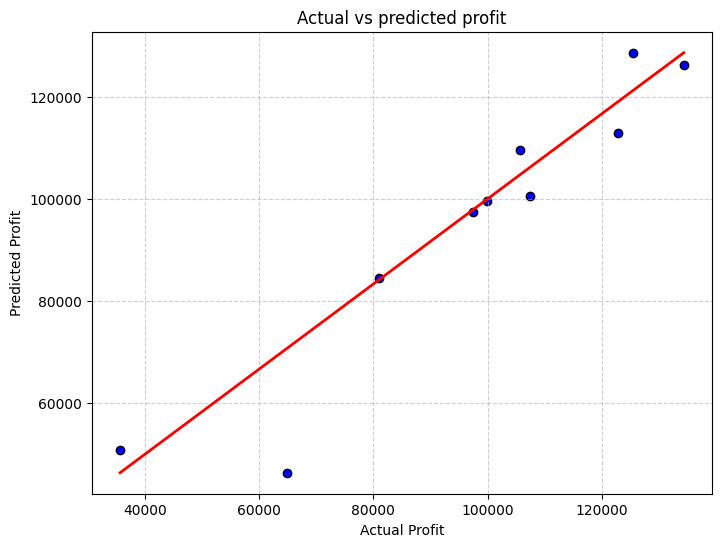

In [17]:
#comparison btw actual & predicted.
comparison=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
comparison.head()

#visualiztion.
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='blue',edgecolor='black')
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color='red',linewidth=2)
plt.title('Actual vs predicted profit')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()